## 📝 **Assignment Instructions** 📚  

### 1️⃣ **Data Loading** (🔟 points)  
- ✅ Complete the `load_mnist_data` function  
- 🔄 Properly **normalize** and **transform** the data  

### 2️⃣ **Custom Dropout** (2️⃣0️⃣ points)  
- 🔧 Implement **forward** and **backward** passes  
- 🎯 Match **PyTorch’s** `nn.Dropout` behavior  
- 📏 Ensure **proper scaling** during training  

### 3️⃣ **Custom BatchNorm, CustomRelu, CustomMaxPooling** (3️⃣0️⃣ points)  
- 🔍 Implement **forward pass** with proper normalization  
- 📊 Track **running statistics** accurately  
- 🔄 Handle **both training and evaluation** modes  

### 4️⃣ **CNN Architecture** (2️⃣0️⃣ points)  
- 🛠️ Implement Your Own **Custom VGG16 Model**  
- 🔢 Use appropriate **layer sizes and activations**  
- 📐 Properly handle **input/output dimensions**  

### 5️⃣ **Training Implementation** (2️⃣0️⃣ points)  
- 🚀 Complete **training and evaluation loops**  
- 📈 Implement **logging and visualization**    

---

### ⭐ **Bonus**  
- 📦 **Data Augmentation**  
- 🔄 **Learning Rate Scheduling**  





### 📝 **Report Guidelines: What to Include**

1️⃣ **Introduction** 📖  
   - Briefly introduce the goal of this assignment.  
   - Explain the importance of building custom components (e.g., CustomBatchNorm, CustomReLU, CustomMaxPooling) in deep learning.  
   - Mention that this exercise will help you understand how these components work internally.

---

2️⃣ **Implementation Details** 🛠️  
   For each component, explain:  
   
   - Describe how you implemented `CustomBatchNorm2d`, `CustomReLU`, and `CustomMaxPooling2d`.  
   - Highlight any key challenges and how you overcame them.  
   - Explain the architecture of your VGG16 model.  
   - Describe how you used custom components in the model's convolutional blocks.  
   - Discuss your choice of activation functions, kernel sizes, and layer design.

---

3️⃣ **Training Strategy and Results** 📈  
   - Describe your training strategy (e.g., hyperparameters, optimizer, learning rate schedule).  
   - Present training and testing accuracy/loss curves.  
   - Report the final test accuracy and compare it with the baseline accuracy using PyTorch's built-in components.  
   - Discuss how your custom components affected the model's performance.  

---

4️⃣ **Conclusion and Future Work** 🔮  
   - Summarize your key findings and insights.  
   - Mention any areas where you would like to improve your implementation (e.g., handling edge cases in `CustomMaxPooling`).  

---

### 📤 **Submission Requirements** 📤  
1️⃣ **Notebook** 📒: Complete the notebook with all implementations of `CustomBatchNorm2d`, `CustomReLU`, `CustomMaxPooling2d`, and your custom VGG16 model.  
2️⃣ **Training Visualizations** 📈: Include accuracy and loss curves for both training and validation.  
3️⃣ **Report** 📝: A concise report explaining your implementation choices, challenges faced, and comparisons with PyTorch's built-in components.  
4️⃣ **PDF Submission** 📄:  
   - Convert your report into a **PDF format**.  
   - Ensure that the PDF includes all sections: Introduction, Implementation Details, Training Results and Conclusion.  
   - Include relevant code snippets and result plots in the PDF.

---

### 📎 **How to Submit:**  
- Submit a **single ZIP file** containing:  
  - 📁 **Notebook (`.ipynb`)**  
  - 📄 **Report (`.pdf`)**  
  - 📊 **Training logs and plots (`.png`/`.pdf`)** if applicable.  
- **Filename format:** `Assignment_<YourName_RollNumber>.zip`  



In [ ]:
# 🚀 **Importing Helper Modules**

import torch  # 🧠 Core PyTorch library for tensor operations and neural networks
import torch.nn as nn  # 🏗️ Neural network components (layers, loss functions)
import torch.optim as optim  # ⚙️ Optimization algorithms (SGD, Adam, etc.)
import torchvision  # 🎨 Computer vision utilities and datasets
import torchvision.transforms as transforms  # 🖼️ Data transformations (normalization, augmentation)
from torch.utils.data import DataLoader  # 🚚 For loading and batching data
from torchvision import datasets
import matplotlib.pyplot as plt  # 📊 Visualization for losses and accuracies
from torch.optim.lr_scheduler import StepLR  # Import the scheduler

## 🔢 **MNIST Dataset: The Classic Benchmark** 🖋️✨  

**MNIST** is a popular dataset of **70,000 handwritten digits** (0-9) 📝, widely used for training and testing image processing systems.  

### 📊 **Dataset Overview**  
- 🖼️ **60,000 Training Images**  
- 🖼️ **10,000 Test Images**  
- 🔲 **Image Size:** 28x28 pixels (grayscale)  
- 🔍 **Digits:** Size-normalized and centered  

### 🌐 **Want to Learn More?**  
Check out the full details here: [📖 Wikipedia - MNIST Database](https://en.wikipedia.org/wiki/MNIST_database)  


In [ ]:
# 🚀 **Part 1: Data Loading and Preprocessing**

# 🛠️ TODO: Complete the data loading code 🧩
def load_mnist_data(batch_size=64):
    """
    📦 **Load and preprocess the MNIST dataset.**
    📜 **Returns:** train_loader and test_loader 🎯
    """
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),  # Flips the image horizontally with 50% probability
        transforms.RandomRotation(10),  # Rotates the image randomly within 10 degrees
        transforms.ToTensor(),  # Converts the image to a PyTorch tensor
        transforms.Normalize((0.1307,), (0.3081,))  # Normalizes the tensor
    ])

    # 🛠️ **TODO: Load MNIST training and test datasets** 🖼️
    # 📌 Hint: Use `torchvision.datasets.MNIST` for dataset loading 📥
    #          Use `torch.utils.data.DataLoader` for creating data loaders 🔄

    train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader  # 🚚 Return the loaders 📦


## 🎯 **Understanding Dropout in Deep Learning** 🚀  

**Dropout** is a regularization technique 🛡️ used to prevent **overfitting** in deep neural networks by randomly ignoring or **"dropping out"** some layer outputs during training.  

### 🔍 **Where is Dropout Applied?**  
Dropout can be implemented in different types of layers:  
- 💡 **Dense (Fully Connected) Layers**  
- 🌀 **Convolutional Layers**  
- 🔁 **Recurrent Layers**  
> 🚫 It is **NOT applied** to the output layer!  

### 🎲 **How Dropout Works**  
The **dropout probability** 🔢 determines how likely it is for a neuron to be dropped out:  
- 🔹 **Input Layer:** Lower dropout probability  
- 🔹 **Hidden Layers:** Higher dropout probability  

By doing so, we ensure that no single neuron becomes **too specialized** or overly dependent on specific features in the training data. This helps the network generalize better to new, unseen data. 🎯✨  


In [ ]:
# 🚀 **Part 2: Custom Dropout Implementation**

class CustomDropout(nn.Module):
    """
    🛠️ TODO: Implement custom dropout layer 🎯

    📜 **Requirements:**
    1️⃣ Initialize with **dropout probability** `p` 🎲
    2️⃣ Implement **forward pass** with proper scaling 🔄
    3️⃣ **Only drop** units during **training** (`self.training` flag) 🏋️‍♂️
    """

    def __init__(self, p=0.5):
        super(CustomDropout, self).__init__()
        # 🎲 Store dropout probability (p between 0 and 1)
        self.p = p

    def forward(self, x):
        # 🔄 **TODO: Implement forward pass**
        if self.training:  # 🏋️‍♂️ Drop units only during training mode
            mask = (torch.rand_like(x) > self.p).float()
            x = x * mask / (1-self.p)

        return x  # 🔄 Return the (possibly dropped) output ✨


## 🔄 **What is BatchNorm2d?** 🧪  

**BatchNorm2d** (Batch Normalization for 2D inputs) is a layer used in deep learning to **normalize** the inputs across a batch during training. It helps your neural network train faster and generalize better! 🚀  

### 🌟 **Why Use BatchNorm2d?**  
- ⚖️ **Normalizes activations** to reduce internal covariate shift  
- 🚀 **Accelerates training**  
- 🛡️ **Acts as a regularizer**, reducing the need for dropout  

---

### 🏗️ **How It Works:**  
1️⃣ **Compute the Mean & Variance** 📊 for each feature map across the batch  
2️⃣ **Normalize the activations**: Subtract the mean and divide by the standard deviation ⚙️  
3️⃣ **Learnable Parameters** 📈: Scale (γ) and Shift (β) to allow flexibility  
   \- **γ (Gamma)** controls the scale 📏  
   \- **β (Beta)** controls the shift ↕️  

---

### 🖼️ **Where is BatchNorm2d Used?**  
- 📦 **Convolutional Neural Networks (CNNs)** after convolution layers  
- 🛠️ Helps stabilize training and improve accuracy 🎯  


In [5]:
# 🚀 **Part 3: Custom BatchNorm2d Implementation**

class CustomBatchNorm2d(nn.Module):
    """
    🛠️ TODO: Implement custom 2D batch normalization 🔄

    📜 **Requirements:**
    1️⃣ Initialize **running mean**, **variance**, **gamma (scale)**, and **beta (shift)** ⚖️
    2️⃣ Implement **forward pass** with proper normalization ✨
    3️⃣ Track **running statistics** during training 📊
    """

    def __init__(self, num_features, eps=1e-5, momentum=0.1):
        super(CustomBatchNorm2d, self).__init__()
        # 🛠️ **TODO: Initialize parameters and buffers**
        pass  # 🚧 Work in progress 🚀
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum

        # Intialize learnable parameters: gamma(scale) and beta (shift)
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))

        # Initialize running mean and running variables as buffers
        # Buffers are not learnable parameters but are part of the module's state
        self.register_buffer('running_mean', torch.zeros(num_features))
        self.register_buffer('running_var', torch.ones(num_features))

    def forward(self, x):
        # Forward pass for batch normalization
        if self.training:
            # Calculate batch mean and variance
            # Calculate batch mean and variance
            # Mean and variance are calculated over the batch and spatial dimensions (height and width)
            batch_mean = x.mean(dim=[0, 2, 3]) #remove the keepdim parameter.
            batch_var = x.var(dim=[0, 2, 3], unbiased=False)

            # Update running statistics
            with torch.no_grad():
                self.running_mean.mul_(1 - self.momentum).add_(batch_mean * self.momentum)
                self.running_var.mul_(1 - self.momentum).add_(batch_var * self.momentum)

            # Normalize with batch statistics
            x_normalized = (x - batch_mean[None, :, None, None]) / torch.sqrt(batch_var[None, :, None, None] + self.eps)
        else:
            # Normalize with running statistics during evaluation
            x_normalized = (x - self.running_mean[None, :, None, None]) / torch.sqrt(self.running_var[None, :, None, None] + self.eps)

        # Apply learnable parameters (gamma and beta)
        x_out = self.gamma[None, :, None, None] * x_normalized + self.beta[None, :, None, None]
        return x_out


## ⚡ **What are Activation Functions?** 🔑  

**Activation functions** introduce **non-linearity** into neural networks, allowing them to learn and solve **complex tasks**. Without them, the network would only be able to learn **linear relationships** (which isn’t very useful for most problems 😅).  

---

### 🌟 **Why are Activation Functions Important?**  
- 🔄 **Adds non-linearity** to the model  
- 🚀 **Enables learning of complex patterns**  
- 🛠️ Helps the network make decisions, just like neurons in the brain 🧠  

---

### 📚 **Common Activation Functions**  

#### 1️⃣ **ReLU (Rectified Linear Unit)** ⚡  
- **Formula:** `f(x) = max(0, x)`  
- **Use:** Most common in hidden layers of CNNs and DNNs  
- **Pros:** Simple, fast, reduces vanishing gradient problem  
- **Cons:** Can suffer from the **dying ReLU** problem 😵  

---

#### 2️⃣ **Sigmoid (Logistic Function)** 📈  
- **Formula:** `f(x) = 1 / (1 + exp(-x))`  
- **Range:** (0, 1)  
- **Use:** Good for binary classification tasks 🔢  
- **Cons:** Can cause **vanishing gradients** 😬  

---

#### 3️⃣ **Tanh (Hyperbolic Tangent)** 🔄  
- **Formula:** `f(x) = (2 / (1 + exp(-2x))) - 1`  
- **Range:** (-1, 1)  
- **Use:** Often used in recurrent networks 🔁  
- **Pros:** Centered around 0, making optimization easier  
- **Cons:** Also prone to vanishing gradients  

---

#### 4️⃣ **Softmax** 🎯  
- **Formula:** Converts logits into probabilities 🔢  
- **Range:** (0, 1), sums to 1  
- **Use:** Last layer for multi-class classification problems  

---

### 🎯 **How to Choose an Activation Function?**  
- For **hidden layers**, use **ReLU** or its variants (like Leaky ReLU or ELU)  
- For **binary classification**, use **Sigmoid**  
- For **multi-class classification**, use **Softmax**  


In [6]:
class CustomReLU(nn.Module):
    """
    🛠️ TODO: Implement custom ReLU activation function ✨

    📜 **Requirements:**
    1️⃣ Apply ReLU manually using tensor operations (avoid using `F.relu`) 🔄
    2️⃣ Output should replace all negative values with 0 (ReLU behavior) 🧹
    """

    def forward(self, x):
        # 🔄 **TODO: Implement forward pass for ReLU**

        # Hint: Use `torch.max` to replace all negative values with 0 🎯
        return torch.max(x,torch.zeros_like(x))


In [7]:
class CustomMaxPooling2d(nn.Module):
    """
    🛠️ TODO: Implement custom 2D MaxPooling layer 🏊

    📜 **Requirements:**
    1️⃣ Implement a max-pooling operation with a given kernel size and stride 📐
    2️⃣ Return the maximum value in each pooling window 🌊
    3️⃣ Ensure it supports both training and evaluation modes 🔄
    """

    def __init__(self, kernel_size=2, stride=2):
        super(CustomMaxPooling2d, self).__init__()
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        # 🔄 **TODO: Implement forward pass for max-pooling**
        # Get the dimensions of the input tensor
        N, C, H, W = x.shape

        x_unfolded = x.unfold(2, self.kernel_size, self.stride).unfold(3, self.kernel_size, self.stride)
        x_unfolded = x_unfolded.contiguous().view(N, C, -1, self.kernel_size * self.kernel_size)
        x_pooled, _ = x_unfolded.max(dim=-1)

        out_shape = (N, C, H // self.stride, W // self.stride)
        x_pooled = x_pooled.view(out_shape)

        return x_pooled


### 🔍 **Hint for MaxPooling with `unfold`**  
`torch.nn.functional.unfold` is a powerful tool that helps break an input tensor into sliding windows. Here's how you can use it to implement max pooling:  

1️⃣ **Unfold the input tensor:** This will give you a collection of overlapping windows based on the `kernel_size` and `stride`.  
```python
# Unfold the input tensor into sliding windows
x_unfolded = x.unfold(2, self.kernel_size, self.stride).unfold(3, self.kernel_size, self.stride)
```

2️⃣ **Reshape the unfolded tensor:** Convert it to a shape that makes it easier to compute the maximum.  
```python
x_unfolded = x_unfolded.contiguous().view(x.size(0), x.size(1), -1, self.kernel_size * self.kernel_size)
```

3️⃣ **Compute the max along the last dimension:** This dimension represents all elements within each window.  
```python
x_pooled, _ = x_unfolded.max(dim=-1)
```

4️⃣ **Reshape back to the correct output size:** This ensures that the output matches what you would expect from a typical max pooling layer.  


## 📜 **Implement Your Own Custom VGG16 Model**

1️⃣ Implement both CustomReLU and CustomMaxPooling2d in the provided classes.

2️⃣ Use only tensor operations like torch.max or unfold (no built-in F.relu or nn.MaxPool2d).

3️⃣ Integrate them into your CustomVGG16 model.

### 🌐 **Want to Learn More?**  
Check out the full details here: [📖 VGG16 Paper](https://arxiv.org/pdf/1409.1556)  


In [8]:
# 🚀 **Part 4: Custom VGG16 Model Implementation**
class CustomVGG16(nn.Module):
    """
    📜 Custom VGG16-like Model with:
    1️⃣ Convolutional blocks using nn.Conv2d, CustomBatchNorm2d, and CustomDropout 🔄
    2️⃣ ReLU activation ⚡ and MaxPooling 🏊
    3️⃣ Fully connected layers at the end
    """

    def __init__(self, num_classes=10):  # num_classes = 10 for MNIST
        super(CustomVGG16, self).__init__()
        # Define your layers here
        self.features = nn.Sequential(
            # Block 1: (Conv2d -> BatchNorm2d -> ReLU -> Conv2d -> BatchNorm2d -> ReLU -> MaxPool2d)
            nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1),
            CustomBatchNorm2d(64),
            CustomReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            CustomBatchNorm2d(64),
            CustomReLU(),
            CustomMaxPooling2d(kernel_size=2, stride=2),

            # Block 2: (Conv2d -> BatchNorm2d -> ReLU -> Conv2d -> BatchNorm2d -> ReLU -> MaxPool2d)
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            CustomBatchNorm2d(128),
            CustomReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            CustomBatchNorm2d(128),
            CustomReLU(),
            CustomMaxPooling2d(kernel_size=2, stride=2),

            # Block 3: (Conv2d -> BatchNorm2d -> ReLU -> Conv2d -> BatchNorm2d -> ReLU -> Conv2d -> BatchNorm2d -> ReLU -> MaxPool2d)
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            CustomBatchNorm2d(256),
            CustomReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            CustomBatchNorm2d(256),
            CustomReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            CustomBatchNorm2d(256),
            CustomReLU(),
            CustomMaxPooling2d(kernel_size=2, stride=2),

            # Block 4: (Conv2d -> BatchNorm2d -> ReLU -> Conv2d -> BatchNorm2d -> ReLU -> Conv2d -> BatchNorm2d -> ReLU -> MaxPool2d)
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            CustomBatchNorm2d(512),
            CustomReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            CustomBatchNorm2d(512),
            CustomReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            CustomBatchNorm2d(512),
            CustomReLU(),
            CustomMaxPooling2d(kernel_size=2, stride=2),

            # Block 5: (Conv2d -> BatchNorm2d -> ReLU -> Conv2d -> BatchNorm2d -> ReLU -> Conv2d -> BatchNorm2d -> ReLU -> MaxPool2d)
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            CustomBatchNorm2d(512),
            CustomReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            CustomBatchNorm2d(512),
            CustomReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            CustomBatchNorm2d(512),
            CustomReLU(),
            CustomMaxPooling2d(kernel_size=2, stride=2),

        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512*7*7, 4096),
            CustomReLU(),
            CustomDropout(p=0.5),
            nn.Linear(4096, 4096),
            CustomReLU(),
            CustomDropout(p=0.5),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        # Implement the forward pass
        x = self.features(x)
        x = self.classifier(x)
        return x


In [9]:
# 🚀 **Part 5: Training Functions**

import torch

def train_epoch(model, train_loader, criterion, optimizer, device):
    """
    🛠️ TODO: Implement training loop for one epoch 🏋️‍♂️
    """
    model.train()  # 📈 Switch to training mode
    running_loss = 0.0  # 💰 Track the cumulative loss
    correct = 0  # ✅ Correct predictions counter
    total = 0  # 📊 Total samples counter

    for batch_idx, (data, target) in enumerate(train_loader):  # 🔄 Loop through batches
        data, target = data.to(device), target.to(device)  # Move data to device
        optimizer.zero_grad()  # Clear gradients
        outputs = model(data)  # Forward pass
        loss = criterion(outputs, target)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item()  # Update cumulative loss
        _, predicted = torch.max(outputs.data, 1)  # Get predictions
        total += target.size(0)  # Update total samples
        correct += (predicted == target).sum().item()  # Update correct predictions

    # 📊 Return average loss and accuracy for the epoch
    return running_loss / len(train_loader), 100. * correct / total

def evaluate(model, test_loader, criterion, device):
    """
    🧪 TODO: Implement evaluation loop 🔍
    """
    model.eval()  # 🔕 Switch to evaluation mode (no gradients)
    test_loss = 0  # 💰 Track cumulative test loss
    correct = 0  # ✅ Correct predictions counter
    total = 0  # 📊 Total samples counter

    with torch.no_grad():  # 🚫 No gradient calculation for evaluation
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)  # Move data to device
            outputs = model(data)  # Forward pass
            loss = criterion(outputs, target)  # Calculate loss
            test_loss += loss.item()  # Update cumulative loss
            _, predicted = torch.max(outputs.data, 1)  # Get predictions
            total += target.size(0)  # Update total samples
            correct += (predicted == target).sum().item()  # Update correct predictions

    # 📊 Return average test loss and accuracy
    return test_loss / len(test_loader), 100. * correct / total

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 57.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.70MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 15.0MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.04MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

🌟 Epoch 1/10
   Train Loss: 1.3063, Train Acc: 57.06%
   Test Loss: 0.1368, Test Acc: 96.48%


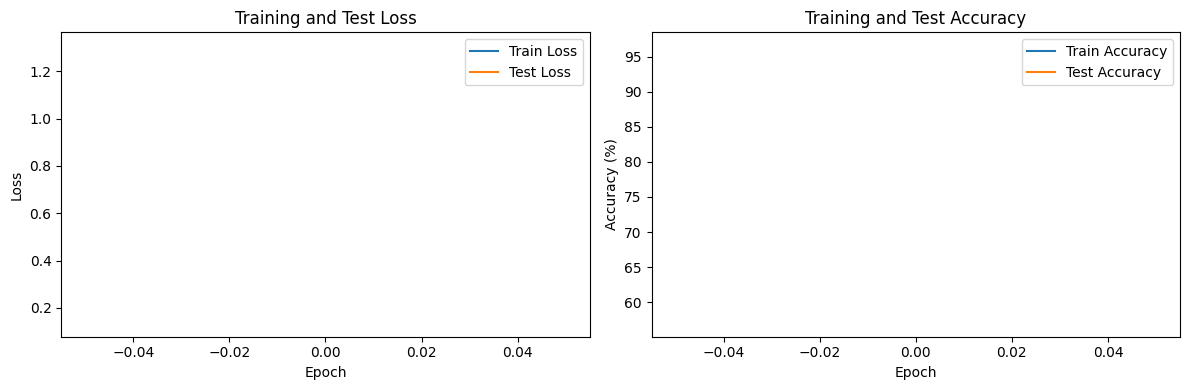

🌟 Epoch 2/10
   Train Loss: 0.1523, Train Acc: 96.12%
   Test Loss: 0.0593, Test Acc: 98.50%


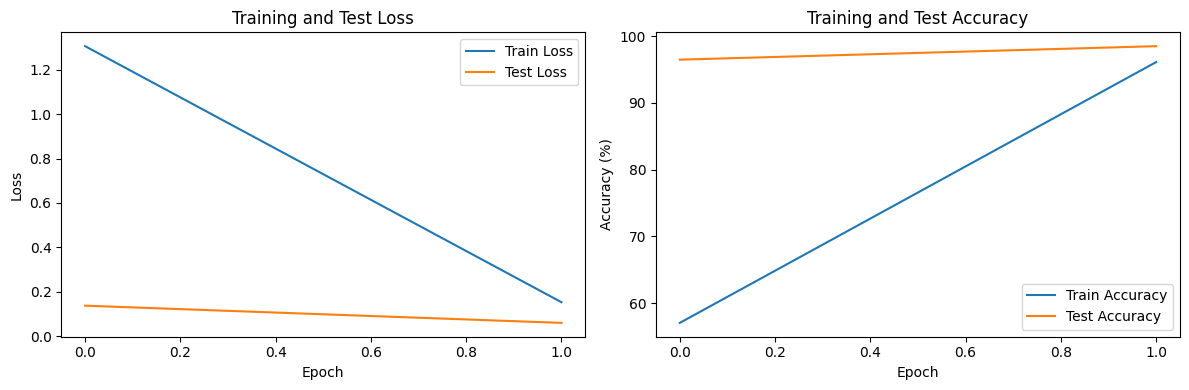

🌟 Epoch 3/10
   Train Loss: 0.1065, Train Acc: 97.53%
   Test Loss: 0.0421, Test Acc: 98.79%


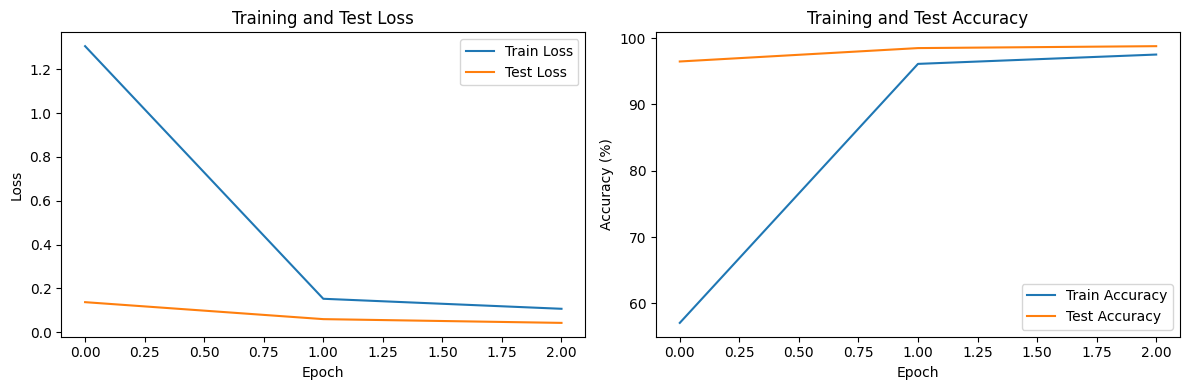

🌟 Epoch 4/10
   Train Loss: 0.0733, Train Acc: 98.14%
   Test Loss: 0.0379, Test Acc: 98.99%


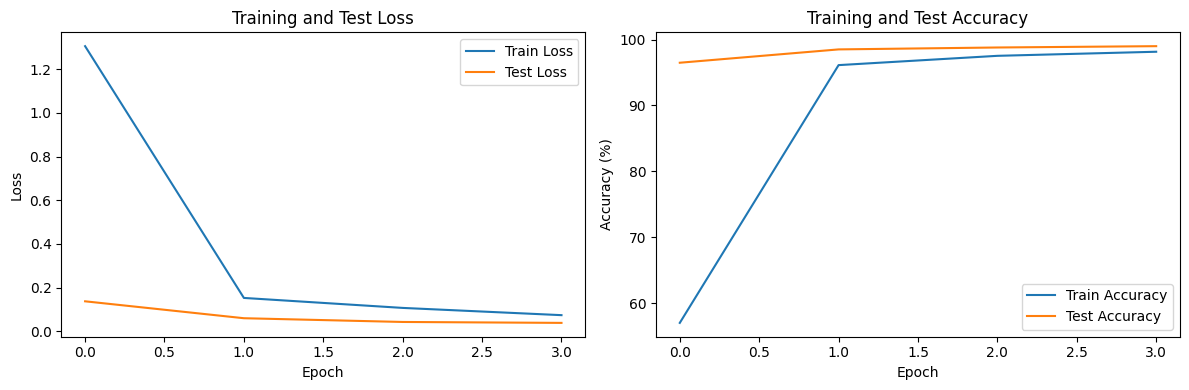

🌟 Epoch 5/10
   Train Loss: 0.0605, Train Acc: 98.49%
   Test Loss: 0.0597, Test Acc: 98.52%


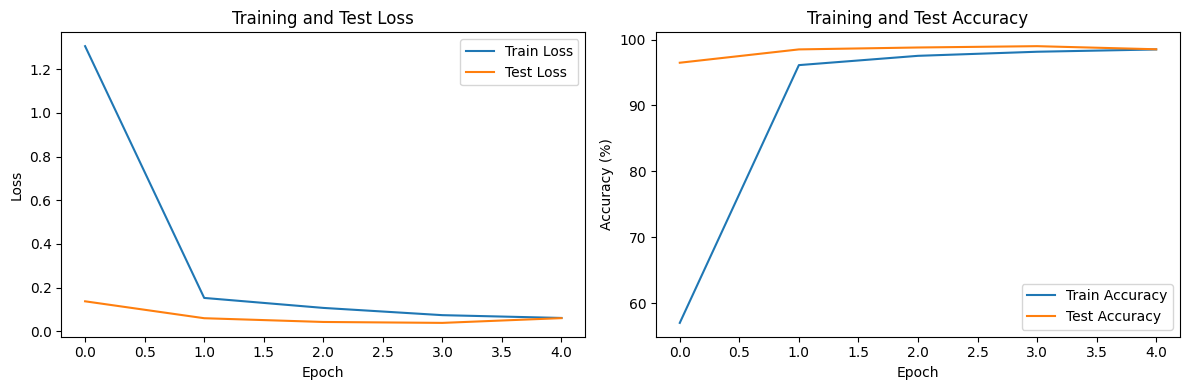

🌟 Epoch 6/10
   Train Loss: 0.0552, Train Acc: 98.67%
   Test Loss: 0.0397, Test Acc: 99.18%


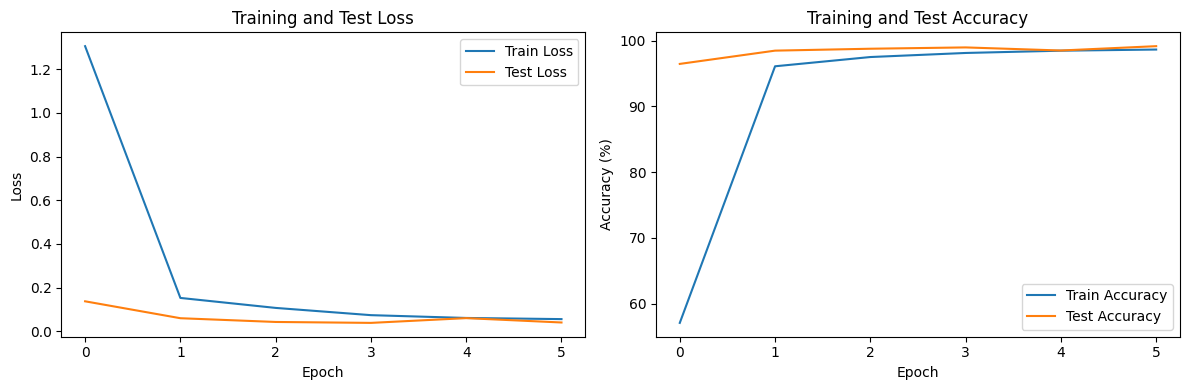

🌟 Epoch 7/10
   Train Loss: 0.0502, Train Acc: 98.79%
   Test Loss: 0.0273, Test Acc: 99.16%


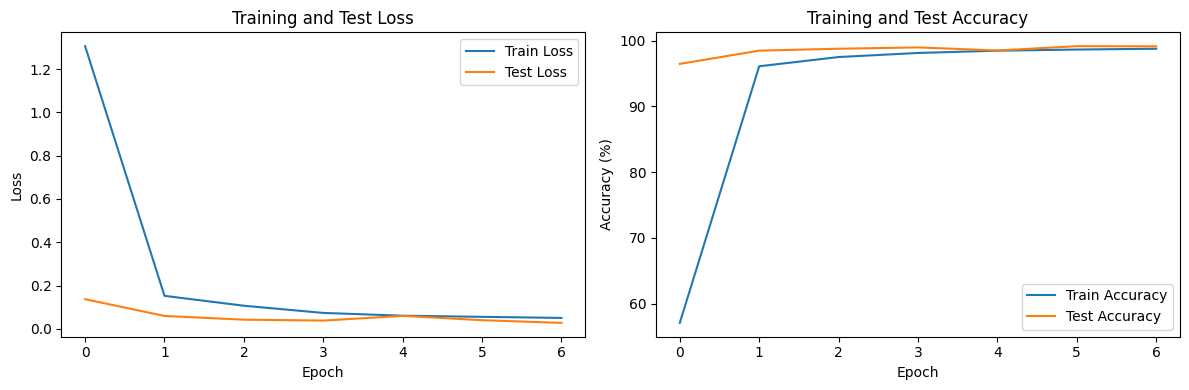

🌟 Epoch 8/10
   Train Loss: 0.0441, Train Acc: 98.94%
   Test Loss: 0.0382, Test Acc: 99.23%


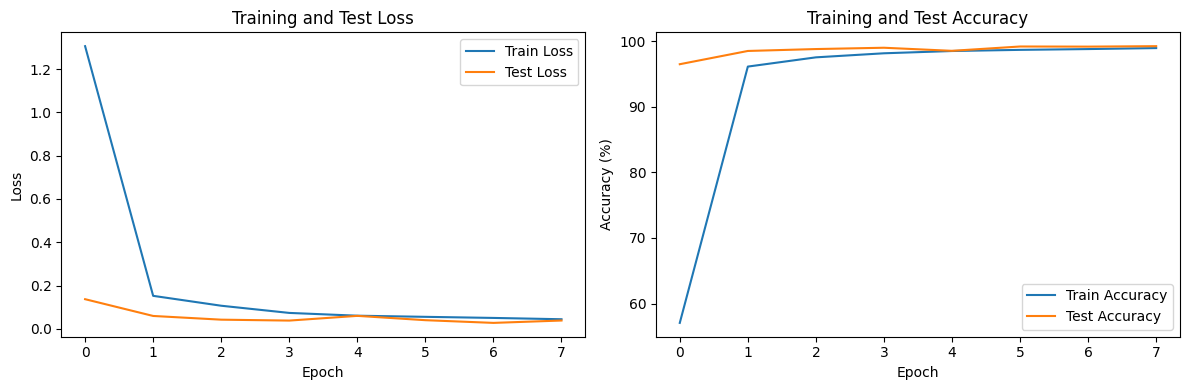

🌟 Epoch 9/10
   Train Loss: 0.0459, Train Acc: 98.89%
   Test Loss: 0.0385, Test Acc: 98.97%


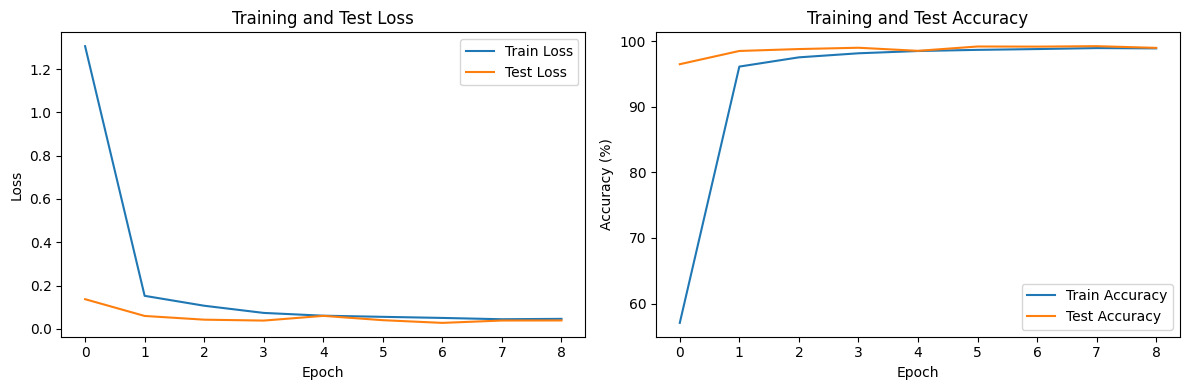

🌟 Epoch 10/10
   Train Loss: 0.0394, Train Acc: 99.03%
   Test Loss: 0.0259, Test Acc: 99.14%


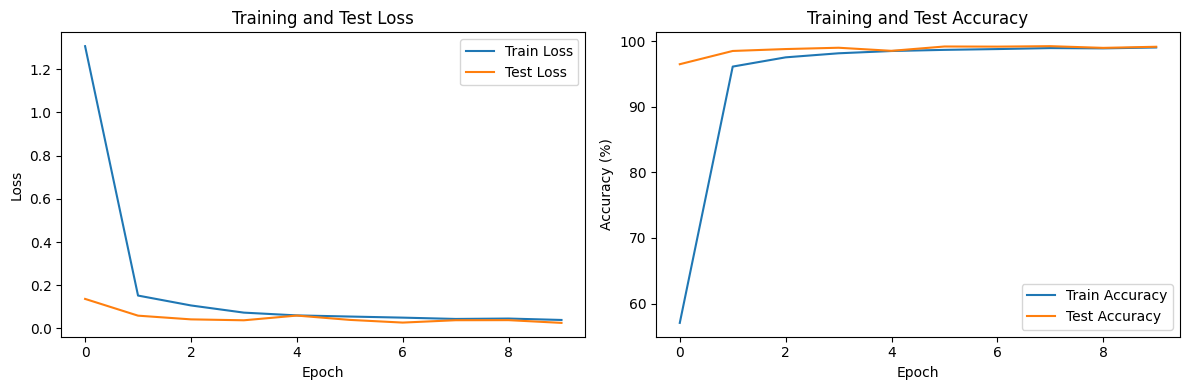

In [ ]:
def main():
    # ⚙️ **Hyperparameters**
    BATCH_SIZE = 16  # 📦 Batch size for data loading
    EPOCHS = 10  # 🔄 Number of training epochs
    LEARNING_RATE = 0.001  # 🚀 Learning rate for optimizer
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # ⚡ Use GPU if available

    # 📊 **Load data**
    train_loader, test_loader = load_mnist_data(BATCH_SIZE)

    # 🛠️ **Initialize model, criterion, optimizer**
    model = CustomVGG16().to(DEVICE)  # 🖥️ Move model to the selected device
    criterion = nn.CrossEntropyLoss()  # 🎯 Loss function for classification
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)  # 🚀 Adam optimizer for better convergence

    # --- Learning Rate Scheduler ---
    # StepLR: Decays the learning rate of each parameter group by gamma every step_size epochs.
    scheduler = StepLR(optimizer, step_size=3, gamma=0.1)  # New scheduler that reduces the learning rate every 3 epochs by 10%


    # 🔄 **Training loop**
    train_losses = []  # 📉 Track training losses
    test_losses = []  # 📉 Track test losses
    train_accs = []  # 📊 Track training accuracy
    test_accs = []  # 📊 Track test accuracy
    learning_rates = [] # track learning rates across epochs

    for epoch in range(EPOCHS):
        torch.cuda.empty_cache()
        print(f"🌟 Epoch {epoch+1}/{EPOCHS}")  # 🕒 Display current epoch

        # 1️⃣ Train for one epoch
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, DEVICE)

        # 2️⃣ Evaluate on test set
        test_loss, test_acc = evaluate(model, test_loader, criterion, DEVICE)

        # 3️⃣ Record losses and accuracies
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        # 4️⃣ Get and track current learning rate
        current_lr = optimizer.param_groups[0]['lr']
        learning_rates.append(current_lr)

        # 5️⃣ Update learning rate at the end of epoch
        scheduler.step() # this will update the learning rate

        # 6️⃣ Print progress 💬
        print(f"   Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"   Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

        # 📈 **Plot results**
        # 🛠️ **Create loss and accuracy plots**
        plt.figure(figsize=(12, 4))
    
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Train Loss')
        plt.plot(test_losses, label='Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Test Loss')
        plt.legend()
    
        plt.subplot(1, 2, 2)
        plt.plot(train_accs, label='Train Accuracy')
        plt.plot(test_accs, label='Test Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title('Training and Test Accuracy')
        plt.legend()
    
        plt.tight_layout()
        plt.show()

main()